# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Load Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Load data
paysim = pd.read_csv(r'C:\Users\paul\Documents\Formation Data Analyst\Bootcamp\Module 3\Labs\Lab_12_Inbalanced\paysim.csv')
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Your code here
paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### What is the distribution of the outcome? 

<AxesSubplot:>

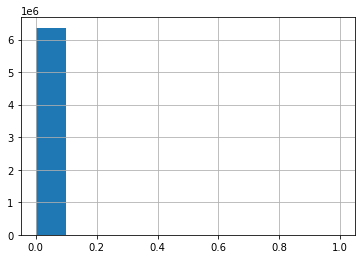

In [4]:
# Your response here
paysim['isFlaggedFraud'].hist()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

There is some correlation between fields. let's Drop 'oldbalanceDest','oldbalanceOrig'


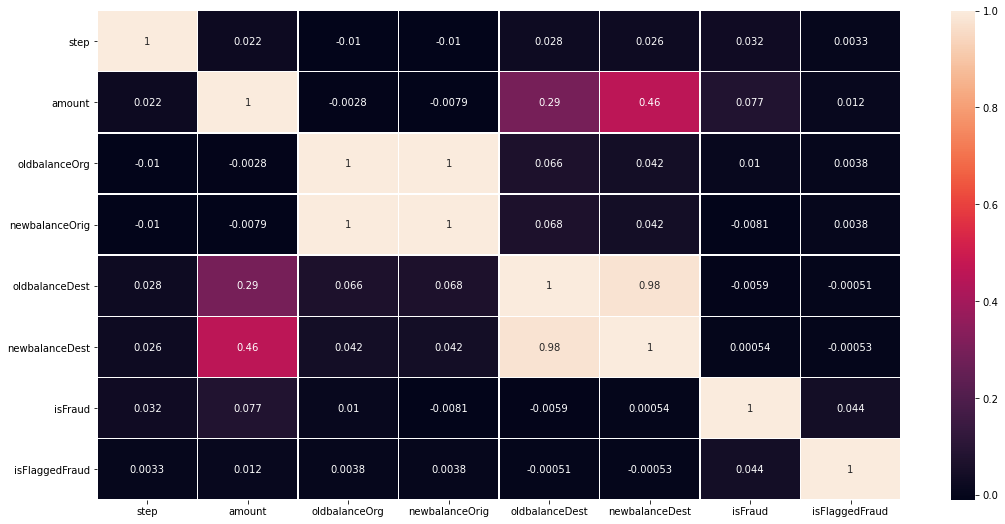

In [5]:
# Your code here
# Check for excessive correlation
plt.figure(figsize=(18,9))
sns.heatmap(paysim.corr(), annot=True, linewidth=0.5)
print("There is some correlation between fields. let's Drop 'oldbalanceDest','oldbalanceOrig'")
paysim.drop(['oldbalanceDest','oldbalanceDest','oldbalanceOrg'], axis=1, inplace=True)

<AxesSubplot:>

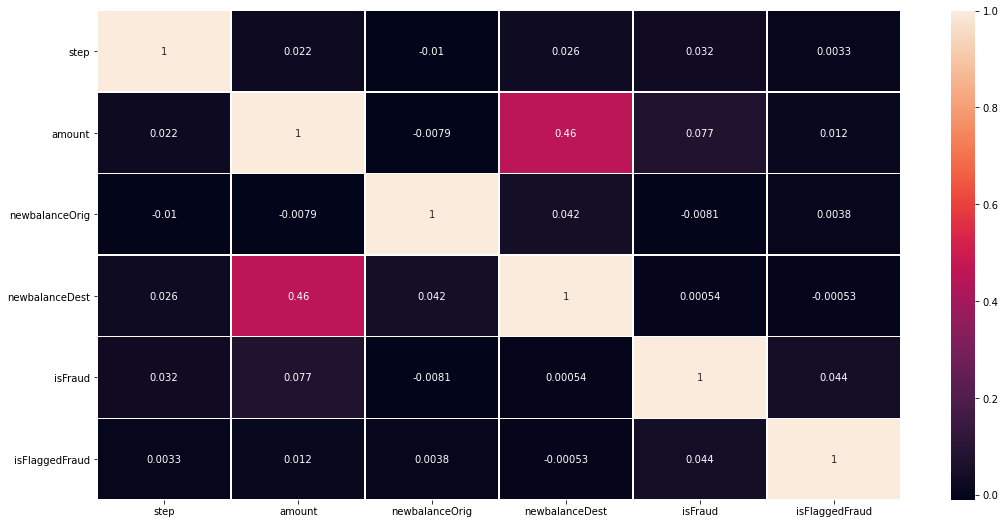

In [6]:
plt.figure(figsize=(18,9))
sns.heatmap(paysim.corr(), annot=True, linewidth=0.5)

In [7]:
# Check for null values
print(paysim.isnull().sum())
print("No null values. Let's move on")

step              0
type              0
amount            0
nameOrig          0
newbalanceOrig    0
nameDest          0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
No null values. Let's move on


In [8]:
print("Step data can be the seconds since first record, so if we define a start date time we can use this field to create a scaled date time field")
print("In this case, and after reading description in Kaggle we know that the steps is the amount of hours passed since a certain start point")
# Let's create a new scalled time
start_datetime =  datetime.datetime(2020, 2, 17, 0,00) # Let's use 1st day of bootcamp as startpoint
paysim['datetime'] = paysim.apply(lambda x: start_datetime + datetime.timedelta(hours=x['step']), axis=1)

Step data can be the seconds since first record, so if we define a start date time we can use this field to create a scaled date time field
In this case, and after reading description in Kaggle we know that the steps is the amount of hours passed since a certain start point


In [9]:
paysim.dtypes

step                       int64
type                      object
amount                   float64
nameOrig                  object
newbalanceOrig           float64
nameDest                  object
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
datetime          datetime64[ns]
dtype: object

In [10]:
# Create dummies fform transfer type
dummies = pd.get_dummies(paysim['type'])
paysim_dummies = pd.concat([paysim, dummies], axis=1)

In [11]:
paysim_dummies.dtypes

step                       int64
type                      object
amount                   float64
nameOrig                  object
newbalanceOrig           float64
nameDest                  object
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
datetime          datetime64[ns]
CASH_IN                    uint8
CASH_OUT                   uint8
DEBIT                      uint8
PAYMENT                    uint8
TRANSFER                   uint8
dtype: object

In [12]:
# Drop a few columns for a better overview
paysim_dummies.drop(['type','nameOrig','nameDest'], axis=1, inplace=True)

<AxesSubplot:>

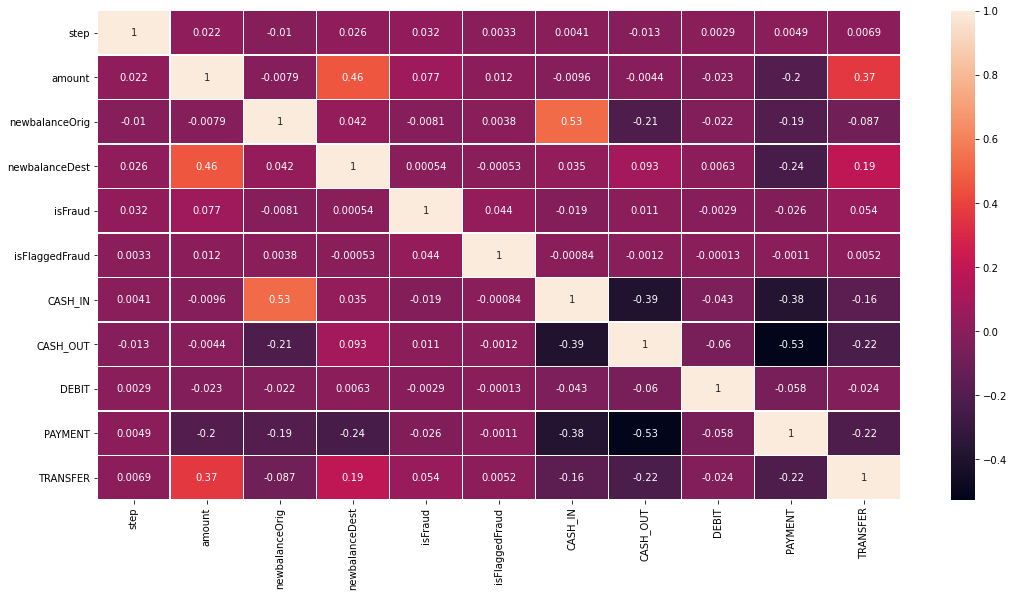

In [13]:
# One last check on the correlation
plt.figure(figsize=(18,9))
sns.heatmap(paysim_dummies.corr(), annot=True, linewidth=0.5)

### Run a logisitc regression classifier and evaluate its accuracy.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [15]:
paysim_dummies['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
# Deal with scalling
majority = paysim_dummies[paysim_dummies['isFraud'] == 0]
minority = paysim_dummies[paysim_dummies['isFraud'] == 1]
 
# Downsample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

# Combine minority class with downsampled majority class
paysim_downsampled = pd.concat([majority_downsampled, minority])

paysim_downsampled['isFraud'].value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [17]:
# Your code here

y = paysim_downsampled['isFraud']
#X = paysim_downsampled.drop(['isFraud','datetime'], axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

NameError: name 'X' is not defined

In [18]:
# Create and train Model
model = LogisticRegression()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [19]:
# Make a prediction
y_pred = model.predict(X_test)

NameError: name 'X_test' is not defined

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

NameError: name 'y_test' is not defined

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
print('precision: ', precision_score(y_test,y_pred))
print('recall:    ', recall_score(y_test, y_pred))
print('f1_score:  ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

NameError: name 'y_test' is not defined

### Now pick a model of your choice and evaluate its accuracy.

In [22]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [23]:
# Make a prediction
knn_predict = knn.predict(X_test)

NameError: name 'X_test' is not defined

In [24]:
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_accuracy_percentage = 100 * knn_accuracy
knn_accuracy_percentage

NameError: name 'y_test' is not defined

### Which model worked better and how do you know?

In [25]:
# Your response here
print("By the accuracy percentage we can see that the model that works best is the KNN model, even without tunning on the number of clusters the difference is quite big.")

By the accuracy percentage we can see that the model that works best is the KNN model, even without tunning on the number of clusters the difference is quite big.
